<a href="https://colab.research.google.com/github/mirnanoukari/Theoretical-Mechanics/blob/main/Week%205%20HW/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Theoretical Mechanics**
## Homework 5
### Student: Mirna Alnoukari

Importing libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from math import sin, cos, tan, sqrt, asin, acos,pi
import scipy.integrate as integrate
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## Task 1

In [14]:
def to_rad(theta):
    return theta*np.pi/180

def task1():
    k = 1.3*10**(-5)
    m = 0.0136
    g = 9.8

    def modelx(v,t):
        dvdt = -k * v*v/m
        return dvdt


    def modely(v,t):
        dvdt = -g/m -k * v*v/m
        return dvdt

    # initial condition
    v0 = 870

    # time points
    total = 20
    t = np.linspace(0,total)

    # solve ODE
    vx = odeint(modelx,v0,t)

    vy = odeint(modely,v0,t)

    fcx = []
    for i in range(len(t)):
        fcx.append(-k*vx[i]**2)

    fcy = []
    for i in range(len(t)):
        fcy.append(-k*vy[i]**2)
    plt.plot(t,fcx, label="Drag in x-axis")
    plt.plot(t,fcy, label="Drag in y-axis")
    plt.xlabel('time -- sec')
    plt.ylabel('Drag force(t) -- Newton')
    plt.legend()
    plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


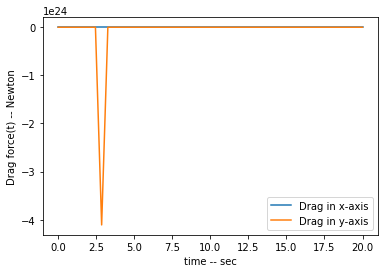

In [15]:
task1()

## Task 2

In [16]:
def task2():
    m = 0.02
    w = np.pi
    r = 0.5
    g = 9.8

    def modelx(v,t):
        # input x = v[0], \dot x  = v[1]
        # return \dot x, \ddot x
        return [v[1], 0 +w*w*v[0] + g*cos(w*t)]

    # initial condition
    v0 = [0,0]

    # time points
    total = 5
    t = np.linspace(0,total)

    # solve ODE
    vx = odeint(modelx,v0,t)

    stop = 0
    for i in vx[:,0]:
        if(i >= r):
            break
        stop += 1
    normal_force = []
    for i,tt in enumerate(t[:stop]):
        normal_force.append(m*g*cos(w*tt) - 2*m*w*vx[i,1])
    plt.title("Relative position X(t)")
    plt.plot(t[:stop],vx[:stop,0], label="X")
    plt.plot(t[:stop],vx[:stop,1], label="\dotX")
    plt.xlabel('time -- sec')
    plt.ylabel('position -- m')
    plt.legend()
    plt.show()

    plt.title("Presure force")
    plt.plot(t[:stop],normal_force, label="Force")
    plt.xlabel('time -- sec')
    plt.ylabel('Force -- N')
    plt.legend()
    plt.show()

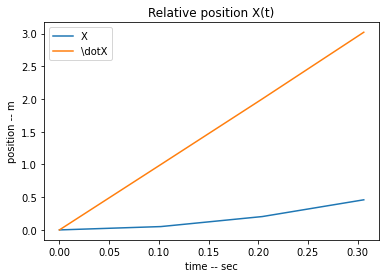

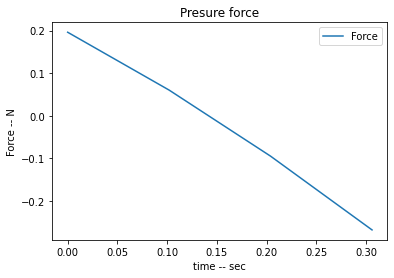

In [17]:
task2()